# 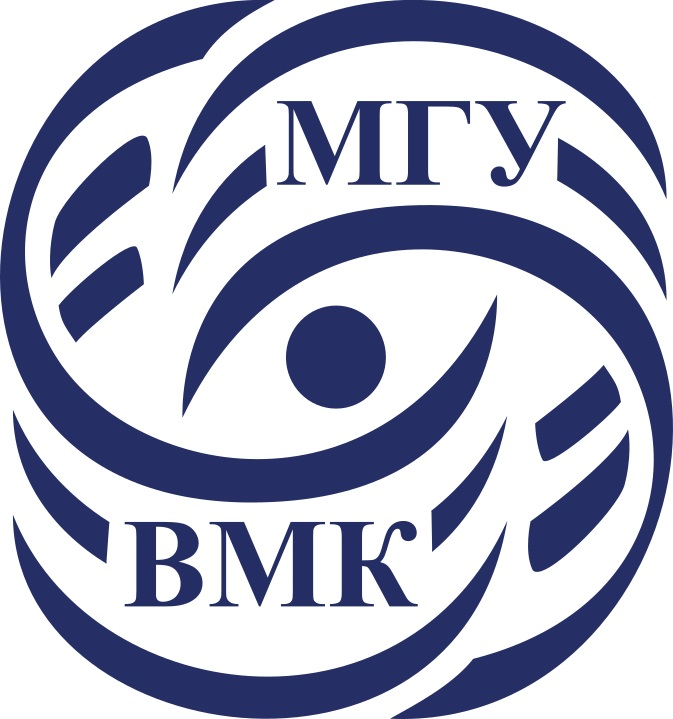

# Машинное обучение. ВМК МГУ

# Практическое задание 6: Ансамбли
## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

__В этом задании вы:__

- Исследуете различные методы ансамблирования разных алгоритмов
- Поработаете с одним из самых мощных алгоритмов машинного обучения - Random Forest (случайными лесами)
- Порешаете интересную физическую задачку :)

-------
<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Downloading...
From: https://drive.google.com/uc?id=10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
To: /content/requirements_2024_25_for_colab_small.txt
100% 375/375 [00:00<00:00, 1.60MB/s]


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

Привет, ребятушки!

Сегодняшний ноутбук посвящен методам ансамблирования.

<font color='CornflowerBlue'>**Ансамбли**</font> - это техника, при которой несколько моделей объединяются для получения более точных результатов. Основная идея заключается в том, что объединение нескольких "плохих" моделей может привести к получению одной, но очень хорошей модели, ведь [соответствующая теорема](https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem) обещает нам, что это возможно.
Существует несколько популярных подходов к ансамблированию. С базовыми методами мы познакомимся в данном ноутбуке. А основному методу ансамблирования, градиентному бустингу, будет посвящено отдельное задание!

**<font color='red'>Внимание!</font> При решении задач разрешается использовать ``n_jobs`` для ускорения обучения.**

Импортируем необходимые библиотеки:

In [3]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

#####
# если Вы не различаете предлагаемые цвета, то Вы можете раскомментить строку ниже
# для применения специальной цветовой палитры или аналогичных
# plt.style.use('tableau-colorblind10')
#####

import numpy as np

import time
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Напишем функцию для генерации датасета и оценки модели. Для экспериментов возьмем классический датасет по классификации рукописных цифр. Чтобы сделать задачу более интересной поместим в обучающее множество всего 10% от всего датасета.

In [4]:
def get_dataset():
    """Return the splits of the dataset for training and testing"""
    X, y = load_digits(return_X_y=True)
    return train_test_split(X, y, random_state=42, train_size=0.1)

X_train, X_test, y_train, y_test = get_dataset()

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

# Комитет большинства

Начнем знакомство с ансамблями с самого простого подхода - комитета большинства.

<font color='CornflowerBlue'>**Комитет большинства**</font> — это метод ансамблевого обучения, который объединяет предсказания нескольких базовых моделей для улучшения общей производительности. Он работает по принципу голосования: каждая из базовых моделей (например, деревья решений, логистическая регрессия и т.д.) делает свои предсказания, а комитет большинства агрегирует эти результаты.

Существует два основных типа голосования:

1. "hard voting" (жесткое голосование), где итоговый класс выбирается на основе большинства голосов,
2. "soft voting" (мягкое голосование), где учитываются вероятности предсказаний моделей, и класс с наивысшей средней вероятностью становится итоговым предсказанием.

Такой подход позволяет снизить вероятность ошибок, поскольку объединение различных моделей может компенсировать слабости каждой из них, что в конечном итоге приводит к более надежным и точным предсказаниям.

## <font color='DarkOrange'>**Задание 1 [0.5 балла]**</font>

**Цели**: В данном задании следует выполнить следующие пункты:

1. Создать отдельный ``LogisticRegression`` и оценить его точность с помощью функции ``evaluate_model``, определенного выше.
2. Обучить модель `VotingClassifier` со следующими алгоритмами: `LogisticRegression`, `KNeighborsClassifier` и `DecisionTreeClassifier` в двух режимах:

* hard voting
* soft voting

4. Сравните качество на тесте всех трех классификаторов. Сделайте вывод о пользе комитета большинства.

<font color='OrangeRed'>**Примечание**</font> - везде берите дефолтные параметры классов, кроме явно обозначенных для перебора

In [5]:
# Logistic regression
log_reg = LogisticRegression()

# Считаем качество для логистической регрессии
log_reg_acc = evaluate_model(log_reg)

# Обучаем комитет большинства

# hard voting
vote_cls_hard = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('kn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier())], voting='hard')

# soft voting
vote_cls_soft = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('kn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier())], voting='soft')

# Качество на hard
vote_cls_hard_acc = evaluate_model(vote_cls_hard)

# Качество на soft
vote_cls_soft_acc = evaluate_model(vote_cls_soft)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [6]:
# Оценка качества

print(f"Log_reg accuracy: {round(log_reg_acc, 3)}\n")
print(f"Vote_cls_hard accuracy: {round(vote_cls_hard_acc, 3)}\n")
print(f"Vote_cls_soft accuracy: {round(vote_cls_soft_acc, 3)}\n")

Log_reg accuracy: 0.917

Vote_cls_hard accuracy: 0.916

Vote_cls_soft accuracy: 0.909



<font color='MediumOrchid'>**Ваши выводы тут:**</font> Видно, что `логистическая регрессия` показала наилучший `accuracy` но разница не столь значительная с `комитетом большинства`.

`Комитет большинства` <u>с мягким голосованием набрал слегка лучшее качество, чем жесткое голосование</u>, но можно не умоляя говорить, что они отработали примерно одинаково.

Также можно заметить, что **используя дефолтные параметры у логистической регрессии возникает проблема со сходимостью из-за малого числа итераций**, как можно заметить по `Warning`, из чего можно сделать вывод, что комитет большинства несмотря, казалось бы за <u>малое число итераций сошелся и выдал хорошее качество</u>, в то время как логистическая регрессия с `"вероятностью п. н."` не сошлась и переобучилась.

Поэтому можно с уверенностью сказать, что комитет большинства благодаря агрегированию результатов предсказаний моделей в нем позволяет получить наилучшее качество путем смешения предсказаний моделей, в частности вероятности предсказаний в данном случае показали слегка наилучшее качество, чем итоговое число голосов.

# Бэггинг



<font color='CornflowerBlue'>**Бэггинг**</font> (bagging, или bootstrap aggregating) - это такой приём в машинном обучении, когда берется куча одинаковых моделей, где каждая модель обучалась на случайном подмножестве нашего датасета. В итоге, хоть каждая модель может ошибаться по-своему,  в среднем ошибки компенсируются, и итоговая предсказательная способность получается лучше, чем у каждой модели по отдельности.


## <font color='DarkOrange'>**Задание 2.1 [0.25 балла]**</font>

Верно ли, что random forest является чисто бэггингоим над деревьями решений? Или нет? Обоснуйте свой выбор

<font color='MediumOrchid'>**Ваши выводы тут:**</font> Я думаю, что **да**, потому что случайный лес из себя представляет собой кучу деревьев, так как это <u>сборка одинаковых по смыслу моделей и каждое дерево обучается по выборке</u>, соответственно идет разделение выборки на части, которые распределяются по деревьям, что совпадает с определением бэггинга.

Ну и также, что суммарная ошибка компенсируется при голосовании, ну и если вспомнить с лекций, что в нем используется `метод случайных пространств`, который гласит, что деревья обучаются на случайных подмножествах, которые выделяются случайным образом.




## <font color='DarkOrange'>**Задание 2.2 [0.5 балла]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Создать отдельный ``DecisionTreeClassifier`` и оценить его точность с помощью функции ``evaluate_model``, определенного выше.
2. Взять класс ``BaggingClassifier``, являющийся стандартным методом `sklearn`, и создать два классификатора:

* один с использованием ``DecisionTreeClassifier`` в качестве базового метода,

* второй с использованием ``LogisticRegression``. В обоих случаях бэггинг должен содержать по 10 моделей. Оцените качество обеих моделей.
3. Возьмите стандартный классификатор ``RandomForestClassifier`` и оцените его качество.
4. Сравните качество всех четырех классификаторов. Сделайте вывод о пользе бэггинга.

<font color='OrangeRed'>**Примечание**</font> - везде берите дефолтные параметры классов

In [7]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Оцениваем качество на DecisionTreeClassifier
dtc_acc = evaluate_model(dtc)

# Собираем BaggingCls
bc_dtc = BaggingClassifier(estimator=dtc, n_estimators=10)
bc_lr = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10)

# Оцениваем качество на BaggingCls
bc_dtc_acc = evaluate_model(bc_dtc)
bc_lr_acc = evaluate_model(bc_lr)

# RandomForestClassifier
rfc = RandomForestClassifier()

# Оцениваем качество RFC
rfc_acc = evaluate_model(rfc)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [8]:
# Сравниваем качество классификаторов

print(f"DecisionTreeCls accuracy: {round(dtc_acc, 3)}\n")
print(f"BaggingCls_DTC accuracy: {round(bc_dtc_acc, 3)}\n")
print(f"BaggingCLS_Log_Reg accuracy: {round(bc_lr_acc, 3)}\n")
print(f"RFC accuracy: {round(rfc_acc, 3)}\n")

DecisionTreeCls accuracy: 0.659

BaggingCls_DTC accuracy: 0.81

BaggingCLS_Log_Reg accuracy: 0.913

RFC accuracy: 0.905



<font color='MediumOrchid'>**Ваши выводы тут:**</font> Из результатов видно, что `DecisionTreeClassifier` выдал качество меньше, чем Бэггинг над деревьями, то есть <u>ошибка каждого из 10 деревьев компенсируется, что позволяет лучше повысить итоговую предсказательную способность</u>, что и наблюдается по метрике, тем самым от одного дерева мы перешли к куче деревьев, компенсация ошибок которых приводит к лучшему качеству.

Причем видно, что `RandomForest` показал качество выше, показатель находится ближе к метрике на бэггинге с `логистической регрессией`, а так как у нас <u>*возникает проблема со сходимостью из-за числа итераций*</u>, то возникает вывод, что наилучшее качество как раз показывает **Бэггинг над деревьями решений**, что как раз и соответствует определению бэггинга, вследствии как раз и его преимуществу перед остальными моделями.

## <font color='DarkOrange'>**Задание 2.3 [0.5 балла]**</font>
**Цели**: Сравнение `BaggingClassifier` над деревьями и `RandomForestClassifier` по качеству на тесте в зависимости от числа выбранных базовых алгоритмов.

1. Обучите `BaggingClassifier` над деревьями и `RandomForestClassifier`, перебирая кол-во базовых алгоритмов. Сетка должна содержать хотя бы 10 значений и покрывать диапазон от 1 до 500 деревьев

2. Получите качество на тесте (``evaluate_model``) и отобразите это графически в зависимости от числа базовых алгоритмов для двух типой моделей. Важно это сделать на одном полотне.

3. Сравните полученные графики. Какие выводы можно сделать о каждом алгоритме? Сранвите результаты двух типов моделей друг с другом.

<font color='OrangeRed'>**Примечание**</font> - везде (кроме кол-ва базовых алгоритмов) берите дефолтные параметры классов

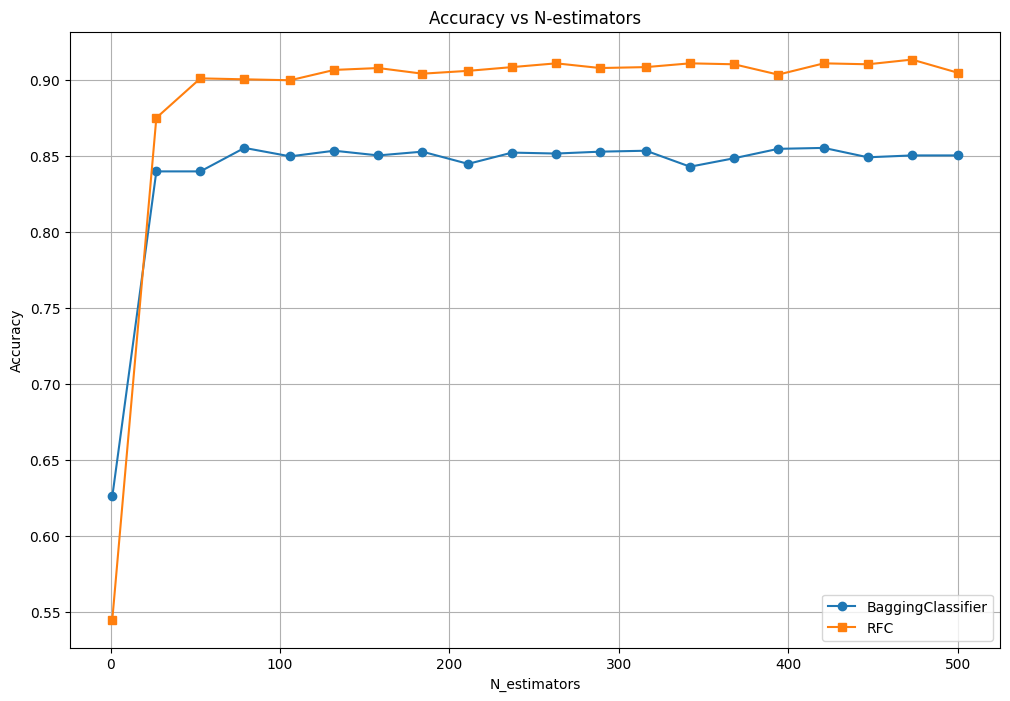

In [9]:
# Задаем сетку количества деревьев
n_estimators_range = np.linspace(1, 500, 20, dtype=int)

# Инициализируем списки для хранения результатов
bc_scores = []
rfc_scores = []

# Обучаем модели
for n in n_estimators_range:
  bc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n)
  rfc = RandomForestClassifier(n_estimators=n)

  bc_scores.append(evaluate_model(bc))
  rfc_scores.append(evaluate_model(rfc))

# Визаулизация
plt.figure(figsize=(12, 8))

plt.plot(n_estimators_range, bc_scores, label='BaggingClassifier', marker='o')
plt.plot(n_estimators_range, rfc_scores, label='RFC', marker='s')
plt.xlabel("N_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs N-estimators")
plt.grid()
plt.legend(loc='best')
plt.show()

<font color='MediumOrchid'>**Ваши выводы тут:**</font> По графику видно, что качество на RandomForest получается выше, чем на Бэггинге,после числа алгоритмов равному $100$ качество начинает потихоньку стабилизироваться на одном уровне.

Это происходит потому, что <u>***деревья решений*** в случайном лесу делают предсказания на независимых подвыборках</u>, т.е. **деревья имеют только свою определенную подвыборку признаков и составляют правило только на основе своих выборок**, в то время как в <u>бэггинге берется куча деревьев и при выделении на случайные подмножестваа каждая модель берет и делает предсказание</u> на подвыборке, из-за чего происходит ***усреднение суммарной ошибки всех моделей на подвыборках***, вследствии качество ухудшается на всей модели.

В то время как в случайном лесу ***ошибки независимы*** и имеют меньший вес на итогове качество предсказания при усреднении.

Как вы увидели в прошлом задании, использование случайного леса помогает добиться качества выше, чем при использовании одного отдельного дерева. Но что случится, если значительно увеличить число деревьев в лесу? Приведет ли это к переобучению? Давайте проверим!

# Стэкинг

Следующий метод, с которым мы познакомимся - стэкинг.

<font color='CornflowerBlue'>**Стекинг**</font> — это такая хитрая стратегия ансамблирования, когда мы обучаем несколько различных методов (как глупых, так и умных) и их предсказания подаются как признаки какому-то другому методу, мета-классификатору. Этот мета-классификатор обучается объединять предсказания всех методов и давать что-то более верное. Давайте попробуем применить стэкинг, ведь он уже реализован за нас!  



## <font color='DarkOrange'>**Задание 3.1 [0.25 балла]**</font>

Какая техника позволяет избежать утечки целевой переменной в стекинге? Коротко объясните

<font color='MediumOrchid'>**Ваши выводы тут:**</font> `Кросс-валидация` (**out-of-fold**).

Идея получения раздельного разбиения данных заключается в передаче этих самых ***OOF-предсказаний*** как признаков для мета-классификатора, а не самих предсказаний, которые сделали модели, обучаясь на тех же данных.

Тем самым обучение происходит на разных подбвыборках, что предотваращает утечку целевой переменной, так как это гарантирует, что модели не будут запоминать данные.

## <font color='DarkOrange'>**Задание 3.2 [0.5 балла]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Использовать `StackingClassifier` из `sklearn`, создав ансамбль из двух базовых моделей: `DecisionTreeClassifier` и `LogisticRegression`. В качестве мета-модели используйте `LogisticRegression`. Оцените качество модели.
1. Добавить в стекинг ещё одну модель, например, `RandomForestClassifier`, и снова оценить качество предсказаний.
1. Сравните качество трёх классификаторов (отдельного дерева решений, стекинга из двух моделей и стекинга из трёх моделей). Сделайте вывод о пользе стекинга.

In [10]:
# Создаем Стэкинг классификатор с ансамблем из DTC и LR

sc = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression())], final_estimator=LogisticRegression())

# Оценка качества
sc_acc = evaluate_model(sc)

# Добавляем в стекинг RFC
sc_with_rfc = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())

# Оцениваем качество стекинга вместе с RFC
sc_with_rfc_acc = evaluate_model(sc_with_rfc)

# Дополнительно обучим дерево решений
dtc_acc = evaluate_model(DecisionTreeClassifier())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [11]:
# Выводим качество для сравнения
print(f"DecisionTreeClassifier accuracy: {round(dtc_acc, 3)}\n")
print(f"StackingClassifier with no RFC accuracy: {round(sc_acc, 3)}\n")
print(f"StackingClassifier with RFC accuracy: {round(sc_with_rfc_acc, 3)}")

DecisionTreeClassifier accuracy: 0.659

StackingClassifier with no RFC accuracy: 0.915

StackingClassifier with RFC accuracy: 0.917


<font color='MediumOrchid'>**Ваши выводы тут:**</font> ***Стекинг*** значительно <u>увеличил качество предсказаний</u>, по сравнению с деревом решений, <u>использование дополнительной модели `RandomForest` позволило слегка увеличить качество</u>.

Получается, что разнообразие моделей в ансамбле в стекинге позволяет улучшить качество предсказаний, что как раз и покрывает идея стекинга, объединение предсказаний быть может `плохих` и `хороших` моделей позволяет собрать <u>наиболее лучшее предсказание</u>.

# Блэндинг

<font color='CornflowerBlue'>**Блендинг**</font> — это метод ансамблирования, похожий на стекинг, но с одной хитростью. В нём используются две группы моделей: базовые модели, которые делают предсказания, и мета-модель, которая учится комбинировать их результаты. Главное отличие от стекинга в том, что базовые модели обучаются на одном наборе данных, а мета-модель — на предсказаниях, сделанных на отдельном валидационном наборе.

Таким образом, для реализации блендинга нужно разбить обучающее множество на две части. На первой части обучить базовые модели, а на второй - получить их предсказания и обучить мета-модель.

## <font color='DarkOrange'>**Задание 4 [1 балл]**</font>
**Цели**: В данном задании следует выполнить следующие пункты:

1. Взять шаблон для `BlendingClassifier`, приведенный ниже, и заполнить все пропущенные участки кода.
1. Воспользоваться любыми базовыми моделями и попробовать получить лучшее качество на диком западе!

In [12]:
import numpy.typing as npt
from typing import List, Tuple
from sklearn.base import BaseEstimator, ClassifierMixin


class BlendingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models: List[ClassifierMixin], meta_model: ClassifierMixin,
                 valid_size: float = 0.2, random_state: int = 42) -> None:
        """
        :param base_models: список базовых моделей (не обученных)
        :param meta_model: мета-модель (не обученная)
        :param valid_size: доля данных для валидации (по умолчанию 20%)
        :param random_state: фиксированный seed для воспроизводимости
        """
        self.base_models: List[ClassifierMixin] = base_models
        self.meta_model: ClassifierMixin = meta_model
        self.valid_size: float = valid_size
        self.random_state: int = random_state
        self.fitted_base_models: List[ClassifierMixin] = []

    def _split_train_valid(self, X: npt.NDArray[np.float64],
                           y: npt.NDArray[np.int_]) -> Tuple[npt.NDArray[np.float64],
                                                              npt.NDArray[np.float64],
                                                              npt.NDArray[np.int_],
                                                              npt.NDArray[np.int_]]:
        """Разделяет данные на обучающую и валидационную выборки."""
        return train_test_split(X, y, test_size=self.valid_size, random_state=self.random_state)

    def _train_base_models(self, X_train: npt.NDArray[np.float64],
                           y_train: npt.NDArray[np.int_]) -> None:
        """Обучает базовые модели на обучающей выборке."""
        self.fitted_base_models = []
        for model in self.base_models:
            fitted_model = model.fit(X_train, y_train)
            self.fitted_base_models.append(fitted_model)

    def _generate_meta_features(self, X_valid: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:
        """Создаёт новые фичи для мета-модели — предсказания базовых моделей."""
        meta_features = np.column_stack([model.predict(X_valid) for model in self.fitted_base_models])
        return meta_features

    def fit(self, X: npt.NDArray[np.float64], y: npt.NDArray[np.int_]) -> "BlendingClassifier":
        """Обучает базовые модели и затем мета-модель."""
        X_train, X_valid, y_train, y_valid = self._split_train_valid(X, y)

        # Обучение базовых моделей
        self._train_base_models(X_train, y_train)

        # Генерация мета-признаков
        meta_features = self._generate_meta_features(X_valid)

        # Обучение мета-модели
        self.meta_model.fit(meta_features, y_valid)

        return self

    def predict(self, X: npt.NDArray[np.float64]) -> npt.NDArray[np.int_]:
        """Предсказывает класс на основе предсказаний базовых моделей."""
        meta_features = self._generate_meta_features(X)
        return self.meta_model.predict(meta_features)

classifier = BlendingClassifier([RandomForestClassifier(), RandomForestClassifier()], RandomForestClassifier())

In [13]:
# Попробуем получить наилучшее качество
our_bc_acc = evaluate_model(classifier)

# пробуем перебрать модели
classifier1 = BlendingClassifier([RandomForestClassifier(), RandomForestClassifier()], LogisticRegression())
classifier2 = BlendingClassifier([ExtraTreesClassifier(), KNeighborsClassifier()], RandomForestClassifier())
classifier3 = BlendingClassifier([RandomForestClassifier(), KNeighborsClassifier()], ExtraTreesClassifier())
classifier4 = BlendingClassifier([LogisticRegression(), RandomForestClassifier()], RandomForestClassifier())
classifier5 = BlendingClassifier([LogisticRegression(), ExtraTreesClassifier()], RandomForestClassifier())
classifier6 = BlendingClassifier([ExtraTreesClassifier(), ExtraTreesClassifier(), ExtraTreesClassifier()], ExtraTreesClassifier())

our_bc_acc1 = evaluate_model(classifier1)
our_bc_acc2 = evaluate_model(classifier2)
our_bc_acc3 = evaluate_model(classifier3)
our_bc_acc4 = evaluate_model(classifier4)
our_bc_acc5 = evaluate_model(classifier5)
our_bc_acc6 = evaluate_model(classifier6)

# Сделаем "люта-сборку :)"
classifiers7 = BlendingClassifier([RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(), ExtraTreesClassifier(), ExtraTreesClassifier(), ExtraTreesClassifier()], ExtraTreesClassifier())
our_bc_acc7 = evaluate_model(classifiers7)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [14]:
print(f"BlendingClassifier: RFC_RFC+RFC accuracy: {round(our_bc_acc, 3)}")
print(f"BlendingClassifier1: RFC_RFC+LRC accuracy: {round(our_bc_acc1, 3)}")
print(f"BlendingClassifier2: ETC_KNC+RFC accuracy: {round(our_bc_acc2, 3)}")
print(f"BlendingClassifier3: RFC_KNC+ETC accuracy: {round(our_bc_acc3, 3)}")
print(f"BlendingClassifier4: LRC_RFC+RFC accuracy: {round(our_bc_acc4, 3)}")
print(f"BlendingClassifier5: LRC_ETC+RFC accuracy: {round(our_bc_acc5, 3)}")
print(f"BlendingClassifier6: ETC_ETC_ETC+ETC accuracy: {round(our_bc_acc6, 3)}")
print(f"Boom BlendingClassifiers7: accuracy: {round(our_bc_acc7, 3)}")

BlendingClassifier: RFC_RFC+RFC accuracy: 0.891
BlendingClassifier1: RFC_RFC+LRC accuracy: 0.526
BlendingClassifier2: ETC_KNC+RFC accuracy: 0.892
BlendingClassifier3: RFC_KNC+ETC accuracy: 0.892
BlendingClassifier4: LRC_RFC+RFC accuracy: 0.892
BlendingClassifier5: LRC_ETC+RFC accuracy: 0.912
BlendingClassifier6: ETC_ETC_ETC+ETC accuracy: 0.914
Boom BlendingClassifiers7: accuracy: 0.918


# ML-задача

С этого момента мы изменим датасет и попытаемся поиграться с физикой: возьмем коллекцию различных потенциалов и для них будем предсказывать некоторую физическую величину. Обученные физики говорят, что эта величина зависит от формы и глубины потенциала, а значит и мы можем тут чему-то научиться. Ранее эту задачу пытались решить с помощью сверточных нейронных сетей. А получится ли это у нас с помощью деревьев?

Загрузим датасет и посмотрим как он выглядит:

**<font color='OrangeRed'>Внимание!</font>** Для выполнения этого задания вам понадобится публичный датасет из соответствующего ML-задания на cv-gml.ru.

Если вы выполняете задание в <font color='OrangeRed'>Google Colab</font>, то можете пропустить дальнейший текст - данные скачаются в следующей ячейке кода.

Если вы делаете <font color='OrangeRed'>локально</font>, то, пожалуйста, выполните эти пункты:

1. Скачайте архив `Шаблон решения` из ML-задания и разархивируйте его в любом удобном для вас месте.
2. Найдите переменную `path_to_dataset`, расположенную на первой строке ячейки после загрузки данных, и измените её значение на полный путь до папки `[ПАПКА_ИЗВЛЕЧЕНИЯ]/public_tests/01_test_potentials_input/train/potentials`


In [15]:
!gdown 1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv


Downloading...
From (original): https://drive.google.com/uc?id=1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv
From (redirected): https://drive.google.com/uc?id=1l7bH623Jmdj-3pKSwhBgxlhkyZJ8xyCv&confirm=t&uuid=6837628f-755f-4d4e-8c25-d90d45466663
To: /content/trees_public_tests.zip
100% 27.8M/27.8M [00:00<00:00, 52.1MB/s]


**<font color='OrangeRed'>Внимание!</font> Если Вы выполняете данное задание в google colab и предыдущий код выполнился с ошибкой (файл не скачался), то Вам нужно будет скачать его вручную**.

Для этого:

1. Перейдите по ссылке, указанной этом в сообщении об ошибке.
1. Скачайте файл вручную на локальный компьютер.
1. Нажмите на иконку папки в левой верхней части данного окна.
1. Вручную загрузите файл в корневую директорию (перетащив файл или нажав ПКМ -> загрузить).

In [16]:
!unzip -d ./public_tests -u /content/trees_public_tests.zip

Archive:  /content/trees_public_tests.zip
   creating: ./public_tests/01_test_potentials_gt/
  inflating: ./public_tests/01_test_potentials_gt/target.json  
   creating: ./public_tests/01_test_potentials_input/
   creating: ./public_tests/01_test_potentials_input/train/
   creating: ./public_tests/01_test_potentials_input/train/potentials/
  inflating: ./public_tests/01_test_potentials_input/train/potentials/0a8c432fef7944bf9f56c5191d8074fe.npz  
  inflating: ./public_tests/01_test_potentials_input/train/potentials/0bc42452c94d493ab94e6d013cd9fecb.npz  
  inflating: ./public_tests/01_test_potentials_input/train/potentials/0fab6fb6c8b84f8da2d536a1fec73912.npz  
  inflating: ./public_tests/01_test_potentials_input/train/potentials/1a8739d04d024541a9b8ef7dc01d5611.npz  
  inflating: ./public_tests/01_test_potentials_input/train/potentials/1e98eec3244d4a4aaaa72ee02b74f028.npz  
  inflating: ./public_tests/01_test_potentials_input/train/potentials/0001f09663374722b1341b1e47f88d24.npz  
  in

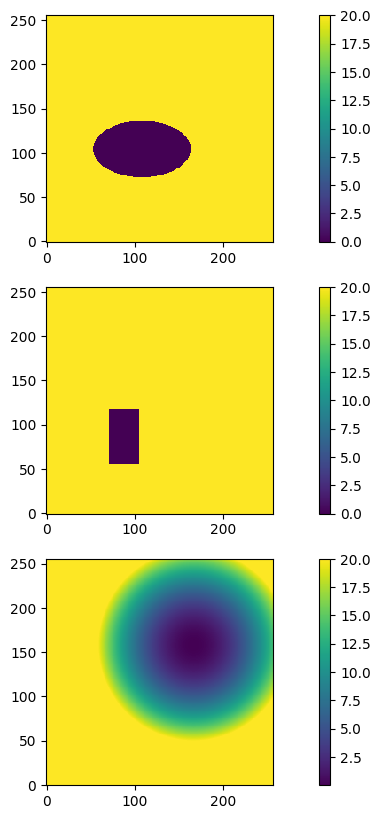

In [17]:
path_to_dataset = "/content/public_tests/01_test_potentials_input/train/potentials"

chosen_ones = {'b2399918793e4228a3ea0a0a89adf11b.npz', '513d5523d14c47feb8b544138071c496.npz', 'ca9f96c404b740e3b28f583f9d9afbf8.npz'}

plt.figure(figsize=(12, 10))

def get_potential_dataset():

    global path_to_dataset

    """Return the training and testing splits of the potential dataset"""
    X, y = [], []

    plot_index = 1

    if not path_to_dataset.endswith("/"):
        path_to_dataset += "/"

    for f in os.listdir(path_to_dataset):

        npz = np.load(f'{path_to_dataset}{f}')
        data, target = npz['data'], npz['target']

        X.append(data)
        y.append(target)

        if f in chosen_ones:
            plt.subplot(len(chosen_ones), 1, plot_index)
            plt.imshow(data, origin="lower", interpolation='none')
            plt.colorbar()
            plot_index += 1
    plt.show()
    return train_test_split(np.array(X), np.array(y), random_state=42)

X_train, X_test, y_train, y_test = get_potential_dataset()



Можно увидеть, что у нас имеется три типа потенциалов: два с бесконечно крутыми стенками: квадратный и эллиптический (их значение резко меняется на 0). Также у нас имеется гармонический потенциал (красивый и круглый, он плавно спускается к своему минимуму). В местах, где потенциала нет, значение матрицы равно 20.

В глаза бросается одна проблема: матрицы у нас квадратные (каждая картинка `256 х 256`), а большинство методов машинного обучения работает с векторами-признаками. К сожалению, нам придется с этим позже разобраться. Но есть еще более крупная проблема: потенциалы находятся в "случайных" местах рисунка, и оставлять это без внимания нельзя. Но вернёмся к нашим баранам. У линейных регрессоров есть одно очень полезное свойство: после обучения мы ``из коробки`` получаем важность признаков: чем выше значение коэффициента (или абсолютное значение) стоящего у признака, тем этот признак важнее. Деревья решений не обладают столь же ``естественной`` оценкой важности признаков, однако мы всё равно можем её получить. Называется эта оценка критерием Джини: она вычисляет то, как начинают ``ошибаться`` предсказания регрессора, если исключить данный признак. Чем сильнее ошибка, тем важнее признак. К нашей радости, sklearn так же ``из коробки`` включает данные оценки признаков. Давайте попробуем воспользоваться этой функцией и посмотреть на важность признаков.

План наших действий следующий. Во-первых, мы должны преобразовать квадратные матрицы в векторы. Для простоты воспользуемся обычным reshape, что сможет гарантировать нам устойчивость преобразования. Получив вектор, мы воспользуемся методами машинного обучения и получим вектор, характеризующий важность каждого признака. Далее, с целью визуализации этого вектора важностей и возможности его сопоставления с оригинальными изображениями, воспользуемся обратным reshape в исходную размерность. Reshape работает таким образом, что если мы сделаем всё верно, то важности признаков попадут в те же пиксели, которым они соответствуют в исходных изображениях. Давайте попробуем это!

## <font color='DarkOrange'>**Задание 5 [2 балла]**</font>
**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: В данном задании следует выполнить следующие пункты:  
1. Воспользоваться классом `PotentialTransformer` для преобразования двумерной матрицы в одномерный вектор
2. Воспользоваться классом `Pipeline`, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить `LinearSVR` из `sklearn` на этом датасете.
4. Обучить `RandomForestRegressor` из `sklearn` на этом датасете.
5. Извлеките важность признаков из обученного леса с помощью `feature_importances_`. Извлеките также коэффициенты svm через `coef_` (брать абсолютные значения необязательно).
6. Преобразуйте одномерный вектор важностей признаков в двумерную картинку таким образом, чтобы их можно было сравнивать с исходными потенциалами. Постройте рисунки важностей признаков с помощью plt.imshow. Добавьте легенду.
7. Оцените качество предсказаний через метод .predict.
8. Проанализируйте результаты. Можно ли сказать что у обоих методов получились одинаковые важности признаков? Можно ли сказать, что важность признаков отображает структуру потенциалов?

In [18]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

class PotentialTransformer:
    """
    A potential transformer.

    This class is used to convert the potential's 2d matrix to 1d vector of features.
    """

    def fit(self, x, y):
        """
        Build the transformer on the training set.
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: trained transformer
        """
        return self

    def fit_transform(self, x, y):
        """
        Build the transformer on the training set and return the transformed dataset (1d vectors).
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: transformed potentials (list of 1d vectors)
        """
        return self.transform(x)

    def transform(self, x):
        """
        Transform the list of potential's 2d matrices with the trained transformer.
        :param x: list of potential's 2d matrices
        :return: transformed potentials (list of 1d vectors)
        """
        return x.reshape((x.shape[0], -1))

# Задаем пайплайны
svr_pipeline = Pipeline([
    ("transformer", PotentialTransformer()),
    ("svr", LinearSVR(random_state=42))
])

rf_pipeline = Pipeline([
  ("transformer", PotentialTransformer()),
  ("rf", RandomForestRegressor(random_state=42))
])

In [19]:
# Обучение
svr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('transformer',
                 <__main__.PotentialTransformer object at 0x7c80b0ec5d90>),
                ('rf', RandomForestRegressor(random_state=42))])

In [20]:
# Извлекаем важность признаков

# RFR
feature_importances_rf = rf_pipeline.named_steps['rf'].feature_importances_.reshape(256, 256)
print(f"Признаки Random Forest Regressor после преобразования размерности: \n{feature_importances_rf}\n")

# SVR
feature_importances_svr = svr_pipeline.named_steps['svr'].coef_.reshape(256, 256)
print(f"Коэффициенты SVR после преобразования размерности: \n{feature_importances_svr}")

Признаки Random Forest Regressor после преобразования размерности: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Коэффициенты SVR после преобразования размерности: 
[[1.39047944e-04 1.34474599e-04 1.30396297e-04 ... 1.29616214e-04
  1.35988548e-04 1.43234584e-04]
 [1.30256802e-04 1.26147640e-04 1.22069338e-04 ... 1.19271189e-04
  1.25643524e-04 1.32157700e-04]
 [1.21981543e-04 1.17872381e-04 1.13794079e-04 ... 1.09000815e-04
  1.15373149e-04 1.21792827e-04]
 ...
 [6.58580834e-05 6.05494428e-05 5.52816791e-05 ... 9.90344693e-05
  1.04810169e-04 1.10630360e-04]
 [7.05626876e-05 6.52540470e-05 5.99862832e-05 ... 1.03555661e-04
  1.09331361e-04 1.15151551e-04]
 [7.53006118e-05 6.99919712e-05 6.47242074e-05 ... 1.08106576e-04
  1.13882276e-04 1.19702466e-04]]


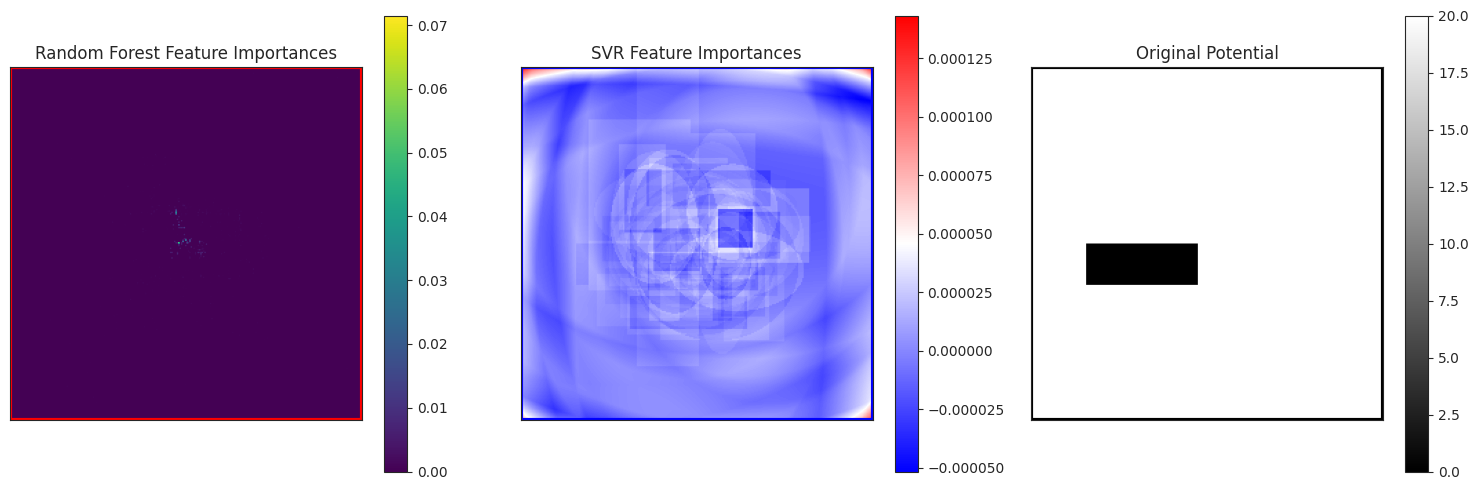

In [21]:
from matplotlib.patches import Rectangle
import seaborn as sns

# Построим рисунки важности признаков

sns.set_style("white")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(feature_importances_rf, cmap='viridis')
axes[0].set_title("Random Forest Feature Importances")
axes[1].imshow(feature_importances_svr, cmap="bwr")
axes[1].set_title("SVR Feature Importances")
axes[2].imshow(X_train[0], cmap="gray")
axes[2].set_title("Original Potential")

for ax in axes:
  ax.set_xticks([])
  ax.set_yticks([])

plt.colorbar(axes[0].imshow(feature_importances_rf, cmap="viridis"), ax=axes[0])
plt.colorbar(axes[1].imshow(feature_importances_svr, cmap="bwr"), ax=axes[1])
plt.colorbar(axes[2].imshow(X_train[0], cmap="gray"), ax=axes[2])

for i, color in enumerate(["red", "blue", "black"]):
  rect = Rectangle((-0.5, -0.5), 256, 256, linewidth=3, edgecolor=color, facecolor='none')
  axes[i].add_patch(rect)

plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error

# Оценка качества по метрике MAE

y_pred_svr = svr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"MAE (LinearSVR): {mae_svr:.3f}")
print(f"MAE (RandomForest): {mae_rf:.3f}")

MAE (LinearSVR): 0.108
MAE (RandomForest): 0.049


<font color='MediumOrchid'>**Ваши выводы тут:**</font> По графикам можно заметить, что **RandomForest** дает более гладкое распределений важностей, чем **SVR**, который выдает хаотичное распределение коэффициентов, в нем сложнее увидеть структуру.

**RandomForest** <u>усредняет важности по всем деревьям</u>, выделяя наиболее значимые области. **LinearSVR** пытается ***линейно разложить данные высокой размерности***, что <u>приводит к чувствительности к шуму</u>.

Получается, что оба метода выделяют важности признаков по разному.

Также можно сделать вывод, что важные области на графике **RandomForest** <u>совпадают с основными зонами на потенциале</u>, в то время как **LinearSVR** выдает несколько иной результат, который не ***позволяет сделать однозначный вывдод*** о корреляции с исходным потенциалом.

Соответственно можно сказать, что важность признаков по ***RandomForest*** отображает структуру потенциалов, а  ***SVR*** нет

---

Если всё сделано верно, то в предыдущем задании вы должны были увидеть некоторый сумбур в коэффициентах SVM. Можно увидеть, как некоторые потенциалы "отпечатались" в признаках, т.е. метод явно запомнил ответ, не пытаясь их обобщить. Видимо, нужно каким-то образом "стандартизировать" потенциалы, чтобы было легче "обобщать" их. К примеру, можно попробовать параллельно передвигать потенциал таким образом, чтобы в центре всегда оказывалось минимальное значение (места на матрице, не заполненные потенциалами, заполняются 20). Возможно вы заметите и другие "проблемы" или найдёте более элегантные решения, которые смогут помочь Вам улучшить результат.



**<font color='OrangeRed'>Внимание!</font> Следующее задание проверяться на кросс-проверке НЕ БУДЕТ! Это решение нужно будет загрузить в проверяющую систему в задание на ML-решение** Здесь вы можете просто поиграть с данными и решением, подобрать оптимальные параметры на кросс-валидации

## <font color='DarkOrange'>**Задание 6 (ML-решение, сдается в систему)**</font>
**Данные**: потенциалы  
**Метрика качества**: MAE  
**Цели**: в данном задании следует выполнить следующие пункты:  
1. Улучшить метод `PotentialTransformer`, чтобы "стандартизировать" данные (к примеру, переносить потенциалы в одно и то же место изображения)
2. Воспользоваться классом `Pipeline`, чтобы "объединить" трансформатор и обучаемый метод
3. Обучить лучшие деревья на Диком Западе (можно воспользоваться любой реализацией лесов из sklearn).
4. Загрузить решение в тестирующую систему

**<font color='OrangeRed'>Внимание!</font>** В этом задании разрешено пользоваться лишь любыми пройденными методами, **кроме методов**, являющихся или содержащих <font color='OrangeRed'>**градиентный бустинг**</font>, а также любых <font color='OrangeRed'>**нейросетевых методов**</font>! Вы можете попробовать как и простые решения, так и пройденные в этом семинаре методы ансамблирования. Например, со списком лесов, которые реализованы в пакете `sklearn.ensemble`, можно ознакомиться [тут](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble). По описанию метода убедитесь, что бустинг в нём не применяется.

**<font color='OrangeRed'>Внимание!</font>**  В задании на cv-gml.ru установлено ограничение по времени обучения в 10 минут. Поэтому, если вы будете перебирать параметры по сетке, то такой перебор может вполне занять несколько часов. Вы можете перебрать параметры в данном ноутбуке, а в качестве решения уже отправить финальный вариант с оптимальными найденными параметрами

**<font color='OrangeRed'>Внимание!</font>**  Если будете использовать леса, то  учтите, что время обучения леса зависит от способности леса построить оптимальное разбиение! Если ваше обучение проходит непозволительно долго, то, вероятно, лесам не удаётся подобрать хорошее оптимальное разбиение, а значит, вам нужно подумать об ином трансформаторе.

In [23]:
from scipy.ndimage import shift
import torch
import torch.nn.functional as F


# Улучшим PotentialTransformer
class PotentialTransformerImproved:
    """
    A potential transformer.

    This class is used to convert the potential's 2d matrix to 1d vector of features.
    """

    def _center_potential(self, x):
      min_pos = np.unravel_index(np.argmin(x), x.shape)
      center_pos = (x.shape[0] // 2, x.shape[1] // 2)

      # Создаем новую матрицу, заполненную значением 20
      centered_potential = np.full_like(x, fill_value=20)

      shift_x = center_pos[0] - min_pos[0]
      shift_y = center_pos[1] - min_pos[1]

      # Проходим по элементам исходной матрицы и переносим их в новую
      for i in range(x.shape[0]):
        for j in range(x.shape[1]):
          new_i, new_j = i + shift_x, j + shift_y
          if 0 <= new_i < x.shape[0] and 0 <= new_j < x.shape[1]:
            centered_potential[new_i, new_j] = x[i, j]

      return centered_potential

    def fit(self, x, y=None):
        """
        Build the transformer on the training set.
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: trained transformer
        """
        return self

    def fit_transform(self, x, y=None):
        """
        Build the transformer on the training set and return the transformed dataset (1d vectors).
        :param x: list of potential's 2d matrices
        :param y: target values (can be ignored)
        :return: transformed potentials (list of 1d vectors)
        """
        return self.fit(x,y).transform(x)

    def transform(self, x):
        """
        Transform the list of potential's 2d matrices with the trained transformer.
        :param x: list of potential's 2d matrices
        :return: transformed potentials (list of 1d vectors)
        """
        X_centered = np.array([self._center_potential(potential) for potential in x])
        return X_centered.reshape(X_centered.shape[0], -1)

In [24]:
# Немного преобразуем функцию get_potential_dataset(), чтобы вывести  потенциалы после сдвига
def get_potential_dataset_added(path_to_dataset, chosen_ones):
  X, y = [], []
  original_potentials = {}

  if not path_to_dataset.endswith("/"):
    path_to_dataset += "/"

  for f in os.listdir(path_to_dataset):
    npz = np.load(f'{path_to_dataset}{f}')

    data, target = npz['data'], npz['target']
    X.append(data)
    y.append(target)

    if f in chosen_ones:
      original_potentials[f] = data

  return np.array(X), np.array(y), original_potentials

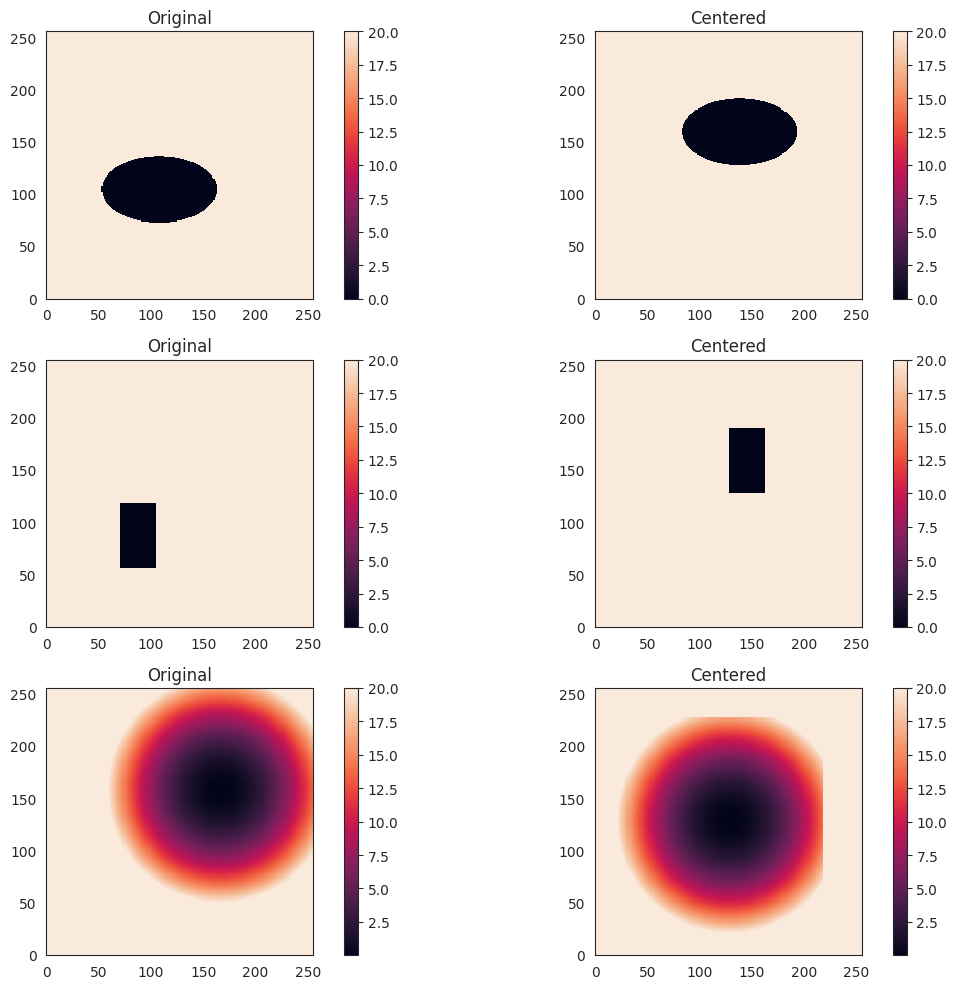

In [25]:
# Посмотрим на картинки после сдвига
path_to_dataset = "/content/public_tests/01_test_potentials_input/train/potentials"

chosen_ones = {'b2399918793e4228a3ea0a0a89adf11b.npz', '513d5523d14c47feb8b544138071c496.npz', 'ca9f96c404b740e3b28f583f9d9afbf8.npz'}

# Получение данных
X, y, original_potentials = get_potential_dataset_added(path_to_dataset, chosen_ones)

# Преобразование потенциалов
transformer = PotentialTransformerImproved()
X_transformed = transformer.transform(X)

# Визуализация оригиналов и центрированных версий
plt.figure(figsize=(12, 10))

for idx, (filename, original) in enumerate(original_potentials.items(), start=1):
  centered = transformer._center_potential(original)
  plt.subplot(len(chosen_ones), 2, 2 * idx - 1)
  plt.imshow(original, origin="lower", interpolation='none')
  plt.title(f"Original")
  plt.colorbar()

  plt.subplot(len(chosen_ones), 2, 2 * idx)
  plt.imshow(centered, origin="lower", interpolation='none')
  plt.title(f"Centered")
  plt.colorbar()

plt.tight_layout()
plt.show()

Проаналализируем разные алгоритмы обучения.

Возьмем: `RandomForestRegressor`, `ExtraTreesRegressor`, `LinearSVR`, `KNeighborsRegressor`, `DecisionTreeRegressor`, `SVR`.

In [26]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [36]:
# Настроим пайплайны c улучшенным трансформером

# Пайплайн с DecisiionTreeRegressor
dt_pipeline = Pipeline([
    ("transformer", PotentialTransformerImproved()),
    ("dt", DecisionTreeRegressor(random_state=42))
])

# Пайплайн с RandomForest
rf_pipeline = Pipeline([
    ("transformer", PotentialTransformerImproved()),
    ("rf", RandomForestRegressor(random_state=42))
])

# Пайплайн с ExtraTrees
et_pipeline = Pipeline([
    ("transformer", PotentialTransformerImproved()),
    ("et", ExtraTreesRegressor(random_state=42))
])

# Пайплайн с LinearSVR
svr_pipeline = Pipeline([
    ("transformer", PotentialTransformerImproved()),
    ("svr", LinearSVR(random_state=42))
])

# Пайплайн с KNeighbors
knn_pipeline = Pipeline([
    ("transformer", PotentialTransformerImproved()),
    ("knn", KNeighborsRegressor(n_neighbors=5))
])

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# DecisionTreeRegressor

dt_params = {
    'dt__criterion': ['absolute_error'],
    'dt__max_depth': [15],
    'dt__max_features': ['log2'],
}

# GridSearchCV
dt_cv = GridSearchCV(dt_pipeline, dt_params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Обучение
dt_cv.fit(X_train, y_train)

# Предсказания и оценка
best_dt_model = dt_cv.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Лучшие параметры для DecisionTreeRegressor: {dt_cv.best_params_}")
print(f"(DecisionTreeRegressor) MAE: {mae_dt:.3f}")

Лучшие параметры для DecisionTreeRegressor: {'dt__criterion': 'absolute_error', 'dt__max_depth': 15, 'dt__max_features': 'log2'}
(DecisionTreeRegressor) MAE: 0.019


In [71]:
from sklearn.model_selection import GridSearchCV

# RandomForestRegressor
# Параметры для перебора
rf_params = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [15, 17, 20],
    'rf__max_features': ['log2'],
    'rf__criterion': ['absolute_error']
}

# GridSearchCV
rf_cv = GridSearchCV(rf_pipeline, rf_params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Обучение
rf_cv.fit(X_train, y_train)

# Предсказания и оценка
best_rf_model = rf_cv.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Лучшие параметры для RandomForestRegressor: {rf_cv.best_params_}")
print(f"(Random Forest) MAE: {mae_rf:.3f}")

Лучшие параметры для RandomForestRegressor: {'rf__criterion': 'absolute_error', 'rf__max_depth': 17, 'rf__max_features': 'log2', 'rf__n_estimators': 100}
(Random Forest) MAE: 0.014


In [66]:
# ExtraTrees

# сетка параметров
et_params = {
    'et__n_estimators': [400],
    'et__max_depth': [15],
    'et__max_features': ['log2'],
    'et__criterion': ['absolute_error']
}

# GridSearchCV
et_cv = GridSearchCV(et_pipeline, et_params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Обучение
et_cv.fit(X_train, y_train)

# Предсказания и оценка
best_et_model = et_cv.best_estimator_
y_pred_et = best_et_model.predict(X_test)

mae_et = mean_absolute_error(y_test, y_pred_et)
print(f"Лучшие параметры для ExtraTreesRegressor: {et_cv.best_params_}")
print(f"(ExtraTrees) MAE: {mae_et:.3f}")

Лучшие параметры для ExtraTreesRegressor: {'et__criterion': 'absolute_error', 'et__max_depth': 15, 'et__max_features': 'log2', 'et__n_estimators': 400}
(ExtraTrees) MAE: 0.008


In [43]:
# LinearSVR

# сетка параметров
svr_params = {
  'svr__epsilon': [1e-4],
  'svr__C': [0.1],
}

# GridSearchCV
svr_cv = GridSearchCV(svr_pipeline, svr_params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Обучение
svr_cv.fit(X_train, y_train)

# Предсказания и оценка
best_svr_model = svr_cv.best_estimator_
y_pred_svr = best_svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"Лучшие параметры для LinearSVR: {svr_cv.best_params_}")
print(f"(LinearSVR) MAE: {mae_svr:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Лучшие параметры для LinearSVR: {'svr__C': 0.1, 'svr__epsilon': 0.0001}
(LinearSVR) MAE: 0.010


In [45]:
# KNN

knn_params = {
    'knn__n_neighbors': [3],
    'knn__weights': ['distance']
}

# GridSearchCV
knn_cv = GridSearchCV(knn_pipeline, knn_params, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

# Обучение
knn_cv.fit(X_train, y_train)

# Предсказания и оценка
best_knn_model = knn_cv.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"Лучшие параметры для KNN: {knn_cv.best_params_}")
print(f"(KNN) MAE: {mae_knn:.3f}")

Лучшие параметры для KNN: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
(KNN) MAE: 0.019


Попробуем `VotingRegressor`

In [74]:
from sklearn.ensemble import VotingRegressor

voting_pipeline = Pipeline([
    ('transformer', PotentialTransformerImproved()),
    ('vt', VotingRegressor([('svr', LinearSVR(C=0.1)), ('et', ExtraTreesRegressor(
        n_estimators=400, criterion='absolute_error', max_depth=15,
        max_features='log2'))]))
])

vt_params = {}

# Обучение
voting_cv = GridSearchCV(voting_pipeline, vt_params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
voting_cv.fit(X_train, y_train)

# Предсказания и оценка
best_voting_model = voting_cv.best_estimator_
y_pred_voting = best_voting_model.predict(X_test)

mae_voting = mean_absolute_error(y_test, y_pred_voting)
print(f"(VotingRegressor) MAE: {mae_voting:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(VotingRegressor) MAE: 0.007


Попробуем `StackingRegressor`

In [75]:
from sklearn.ensemble import StackingRegressor

stacking_estimators = [
    ('svr', LinearSVR(C=0.1)),
     ('et', ExtraTreesRegressor(
         n_estimators=400, criterion='absolute_error', max_depth=15,
         max_features='log2'))
]

stacking_pipeline = Pipeline([
    ('transformer', PotentialTransformerImproved()),
    ('st', StackingRegressor(estimators=stacking_estimators,
                             final_estimator=ExtraTreesRegressor(
         n_estimators=400, criterion='absolute_error', max_depth=15,
         max_features='log2')))
])

st_params = {}

# Обучение
stacking_cv = GridSearchCV(stacking_pipeline, st_params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
stacking_cv.fit(X_train, y_train)

# Предсказания и оценка
best_stacking_model = stacking_cv.best_estimator_
y_pred_stacking = best_stacking_model.predict(X_test)

mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
print(f"(StackingRegressor) MAE: {mae_stacking:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

(StackingRegressor) MAE: 0.010


#<font color='MediumSeaGreen'> **Задание 7 [Bonus][0.5 балл]** </font>
Найдите мем про деревья решений/случайные леса лучше, чем этот:

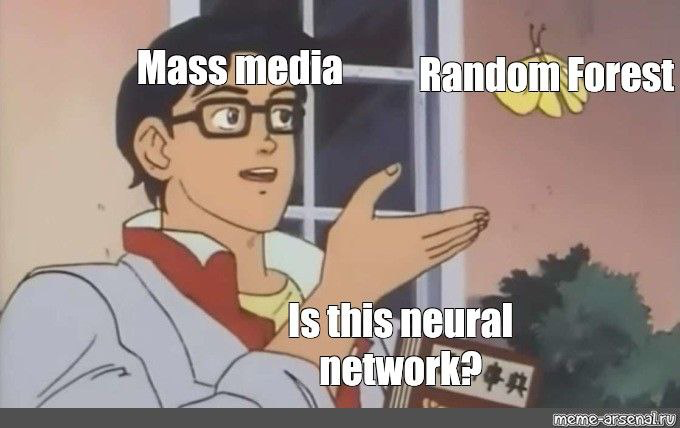

Важно: самый простой способ вставить картинку будет через Google Colab (даже если вы изначально делали не в нем). Нажмите на **"+ Text"**, в появившейся ячейке сделайте **прикрепление картинки** (как на скринах). Тогда ваша картинка "зашифруется" и будет корректно отображаться при конвертации в html

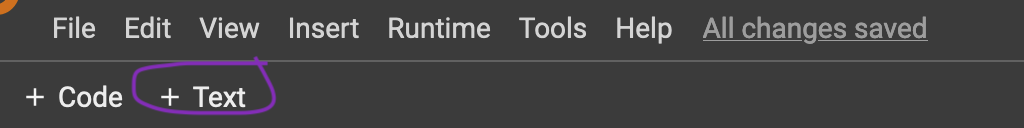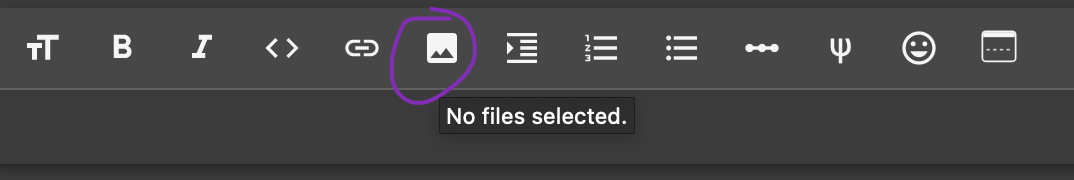

![RF](https://cdn.prod.website-files.com/62d9f09a3f988192955bafdd/632836781d578d84b3d3b6b0_68238179.jpeg)

Ну что, детишки. Поздравляю с еще одним выполненным ДЗ!

